Test di Mann–Whitney–Wilcoxon per il confronto su una scala di Likert di 2 popolazioni differenti (es. metodi di planning) provenienti dalle risposte di questionari di valutazioni. Invece, il test di Kruskal-Wallis serve pr il confronto di n popolazioni differenti.
1. Montare il Drive.
2. Recuperare il percorso delle risposte del questionario: content/drive/...
3. Sostituire il valore della costante PATH

In [38]:
!pip install pingouin
!pip install openpyxl
!pip install Jinja2

  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'I felt safe when working with the robot.', 'I am satisfied with the assignment and order of the tasks', 'The robot came too close to me for my comfort.', 'I am satisfied with the coexistence with the robot to execute the process.', 'During the whole process, I always knew what the robot was going to do.', 'I trusted the robot would not harm me.', 'Idle times bother me.', 'Bar Time stresses me.', 'The assignment and order of the tasks can be improved', 'The robot moved too fast for my comfort.', 'During the whole process, I always knew what I was requested to do.', 'The coexistence with the robot during the execution of the process was fluent.', 'I felt that I was getting too close to the robot to perform my tasks.', 'The robot often stopped because you are in the area near the robot'}
Empty DataFrame
Columns: [Method A (Median), Method B (Median), Method C (Median), Method D (Median), Method A (Skew), Method B (Skew), Method C (Skew), Method D (Skew)]
Index: []
Question 4: I am satis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


--------------
Question 6: I felt that I was getting too close to the robot to perform my tasks.
11.161831794871791
0.010882215388651226
[None, None]
At least one group is significantly different from the others.
          Median      Skew
Method A     3.0 -0.023882
Method B     3.0 -0.061340
Method C     2.0 -0.148961
Method D     1.0  0.802288
('Method C', 'Method A')
4.249485903814258
0.0392622142082428
Differenza rilevata
('Method C', 'Method B')
6.470757946210256
0.010966375251155435
Differenza rilevata
('Method D', 'Method A')
4.262208915502325
0.038969217566457666
Differenza rilevata
('Method D', 'Method B')
6.46285714285713
0.011015239060870931
Differenza rilevata
6
                     Method A  Method B  Method C  Method D
Question 6 User  0          3         2         2         2
           User  1          4         4         2         2
           User  2          1         1         1         1
           User  3          4         3         2         1
           User  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


--------------
Question 10: The coexistence with the robot during the execution of the process was fluent.
27.184449182658113
5.385764691401061e-06
[None, None]
At least one group is significantly different from the others.
          Median      Skew
Method A     3.0  0.623148
Method B     4.0 -0.451439
Method C     5.0 -0.148961
Method D     5.0 -1.791551
('Method C', 'Method A')
15.412691536301647
8.640601667505278e-05
Differenza rilevata
('Method C', 'Method B')
9.437577901296939
0.0021258406154128382
Differenza rilevata
('Method D', 'Method A')
16.14649422482513
5.8626983295861825e-05
Differenza rilevata
('Method D', 'Method B')
11.47133683596029
0.0007067782135813584
Differenza rilevata
10
                      Method A  Method B  Method C  Method D
Question 10 User  0          2         4         5         5
            User  1          2         4         5         5
            User  2          3         4         4         5
            User  3          2         3         4  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


--------------


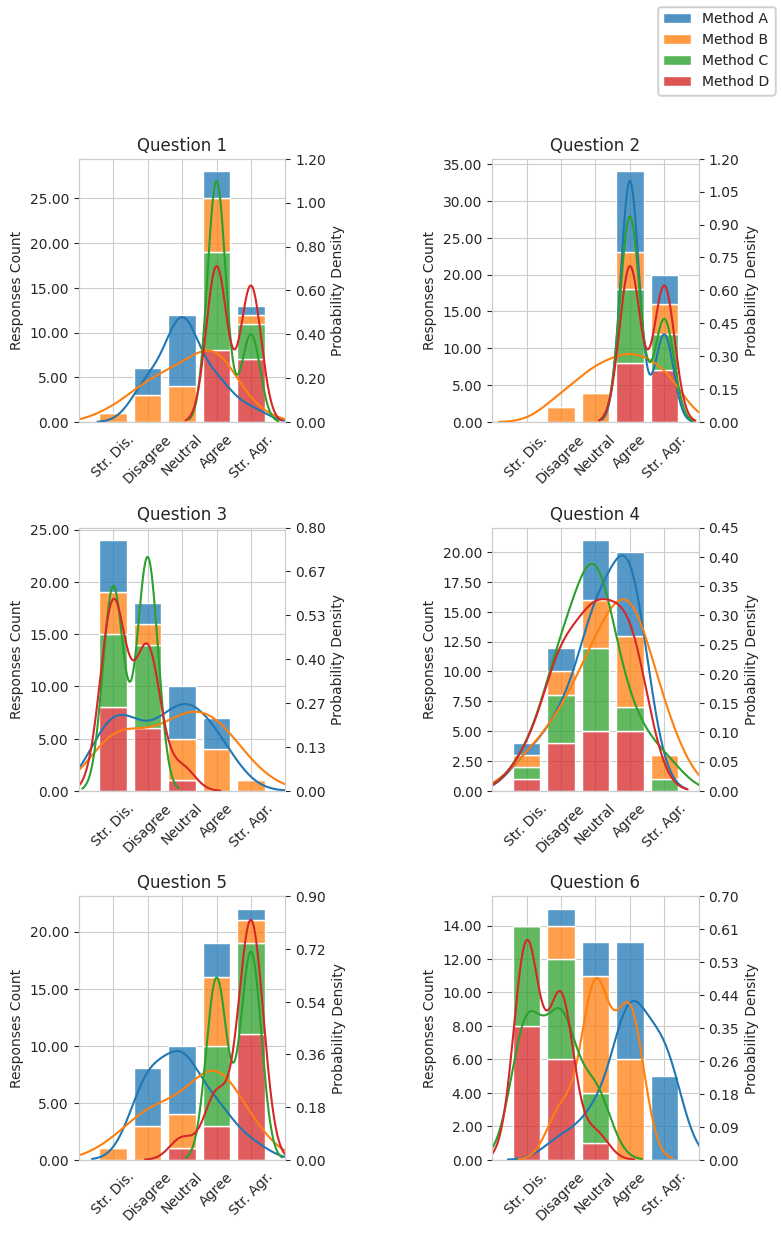

\begin{tabular}{lrrrrlr}
\toprule
 & Method C VS Method A & Method C VS Method B & Method D VS Method A & Method D VS Method B & Statistical Differences Between Methods & p-value (K.-W. Test) \\
\midrule
Question 1: I am satisfied with the coexistence with the robot to execute the process. & 0.000232 & 0.002191 & 0.000112 & 0.000648 & True & 0.000012 \\
Question 2: I felt safe when working with the robot. & 0.695270 & 0.090873 & 0.263781 & 0.038393 & False & 0.108669 \\
Question 3: I felt that I was getting too close to the robot to perform my tasks. & 0.039262 & 0.010966 & 0.038969 & 0.011015 & True & 0.010882 \\
Question 4: Idle times bother me. & 0.229660 & 0.130868 & 0.403949 & 0.208855 & False & 0.353565 \\
Question 5: The coexistence with the robot during the execution of the process was fluent. & 0.000086 & 0.002126 & 0.000059 & 0.000707 & True & 0.000005 \\
Question 6: The robot often stopped because you are in the area near the robot & 0.000012 & 0.000108 & 0.000005 & 0.000015

In [42]:
from scipy import stats
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.legend

# import pingouin as pg

# sns.set_style("white")
MAPPING_SCALE = {"Strongly Disagree": 1,
                 "Disagree": 2,
                 "Neither Agree nor Disagree": 3,
                 "Agree": 4,
                 "Strongly Agree": 5,
                 "Poor": 1,
                 "Bad": 2,
                 "Neutral": 3,
                 "Good": 4,
                 "Excellent": 5}

METHODS_TO_COMPARE = {"Method A":"Baseline TP",
                      "Method B":"Not Neighboring TP",
                      "Method C":"HA-TP Relaxed",
                      "Method D":"HATP"}
COUPLING_OF_METHODS_TO_COMPARE = [("Method C", "Method A"),
                                  ("Method C", "Method B"),
                                  ("Method D", "Method A"),
                                  ("Method D", "Method B")]

DIFFERENCES = "Statistical Differences Between Methods"
# INTERESTED_QUESTION = [1,2,3,6,7,8,12,13]
INTERESTED_QUESTION = ["I felt safe when working with the robot.",
                       "I felt that I was getting too close to the robot to perform my tasks.",
                       "The robot often stopped because you are in the area near the robot",
                       "The coexistence with the robot during the execution of the process was fluent.",
                      #  "The robot came too close to me for my comfort.",
                       "I am satisfied with the coexistence with the robot to execute the process.",
                       "Idle times bother me."]
MEAN_COLUMN_FORMAT = "{} (Median)"
STD_COLUMN_FORMAT = "{} (Skew)"
ANALYSE_ALL_QUESTION = False
TEST_COLUMN_NAME = "p-value (K.-W. Test)"
PATH = "/content/drive/MyDrive/Dottorato/Articoli Proprietà/TPHA/Analisi_Questionario/Copia di TPHA_Questionnaire.xlsx"
PATH = "https://github.com/JRL-CARI-CNR-UNIBS/hrc_case_study/raw/e_waste_case_study/hrc_case_study_results/Questionnaire/TPHA_Questionnaire.xlsx"
SAVE_PATH = "/content/drive/MyDrive/Dottorato/Articoli Proprietà/TPHA/Analisi_Questionario/"
SAVE_PATH = "/home/samuele/projects/cells_ws/src/hrc_case_study_cell/hrc_case_study/hrc_case_study_results/Questionnaire/"

BOXPLOT = False
VERTICAL = True

if BOXPLOT:
  sns.set_theme()
else:
  sns.set_style("whitegrid")
  # sns.set(rc={'grid.linewidth': 0.1})
def get_questions(columns_name, method_to_compare):
  questions = set()
  for column_name in questionnaire_responses.columns:
    if any([method in column_name for method in method_to_compare]):
      matched_string = re.search(r'\[([^]]+)\]', column_name)   #Extract [*]
      if matched_string:
        between_square_brack = matched_string.group(1)
        questions.add(between_square_brack)
      else:
        raise Exception("No [] detected")
    else:
      pass
      # print(f"{column_name} will not be compared")
  return questions

questionnaire_responses = pd.read_excel(PATH)

# Replace Likert Scale with Numerical Scale
questionnaire_responses = questionnaire_responses.replace(MAPPING_SCALE)

# Get Questions
questions = get_questions(questionnaire_responses.columns, METHODS_TO_COMPARE.keys())
print(questions)

n_user = len(questionnaire_responses.index)
question_user_tuple = []
question_correspondence = dict()

if not ANALYSE_ALL_QUESTION:
  # fig, axs = plt.subplots(3, 2, figsize=(6, 14), gridspec_kw={'hspace': 0.6, 'wspace': 0.7, 'width_ratios': [3, 3, 3]}) #
  # fig, axs = plt.subplots(3, 2, figsize=(8, 15), gridspec_kw={'hspace': 0.5, 'wspace': 1, 'width_ratios': [6, 6]}) #
  if VERTICAL:
    fig, axs = plt.subplots(3, 2, figsize=(8, 13), gridspec_kw={'hspace': 0.4, 'wspace': 1}) #
  else:
    # fig, axs = plt.subplots(2, 3, figsize=(6, 14), gridspec_kw={'hspace': 0.6, 'wspace': 0.7, 'width_ratios': [3, 3, 3]})
    fig, axs = plt.subplots(2, 3, figsize=(12, 6), gridspec_kw={'hspace': 0.6, 'wspace': 0.7, 'width_ratios': [3, 3, 3]}) #

question_id = 0

test_result_p_value = pd.DataFrame(columns=[f"{method_1} VS {method_2}" for (method_1,method_2) in COUPLING_OF_METHODS_TO_COMPARE])
test_result_p_value[DIFFERENCES] = None
test_result_p_value[TEST_COLUMN_NAME] = None

column_names = [MEAN_COLUMN_FORMAT.format(method) for method in METHODS_TO_COMPARE.keys()] + \
               [STD_COLUMN_FORMAT.format(method) for method in METHODS_TO_COMPARE.keys()]

stats_results_comparison = pd.DataFrame(columns=column_names)
print(stats_results_comparison)
questions = sorted(questions)

selected_question = [question for question in questions if (question in INTERESTED_QUESTION) or (ANALYSE_ALL_QUESTION)]
# cronbach_pd = pd.DataFrame(columns=selected_question)

for id, question in enumerate(questions):
  question_name = f"Question {question_id + 1}: {question}"
  if (question not in INTERESTED_QUESTION) and not(ANALYSE_ALL_QUESTION):
    continue
  test_result_p_value.loc[question_name] = None

  single_question_pd = questionnaire_responses.filter(like=question)
  single_question_pd_sorted = single_question_pd.reindex(sorted(single_question_pd.columns), axis=1)

  # input()
  # display()
  int_method = single_question_pd.columns[0]
  # print(int_method)
  # display(single_question_pd)

  # print(type(single_question_pd.columns[0]))

  # cronbach_pd.loc[:,question] = single_question_pd.loc[:,single_question_pd.columns[0]]
  # print(single_question_pd.loc[:,display])
  # input()

  print(f"Question {id}: {question}")
  question_correspondence[f"Question {id}"] = question

  questions_user_array = np.array([f"Question {id}" for user in range(0,n_user)])
  users_array = np.array([f"User  {user}" for user in range(0,n_user)])

  question_user_list = [questions_user_array, users_array]
  df = pd.DataFrame(single_question_pd_sorted.to_numpy(), index=question_user_list, columns = METHODS_TO_COMPARE.keys())

  statistic, p_value = stats.kruskal(*[df.loc[:,method] for method in METHODS_TO_COMPARE.keys()])
  print(statistic)
  print(p_value)
  print(df.index.names)
  # display(df)
  test_result_p_value.loc[question_name,TEST_COLUMN_NAME] = p_value
  if p_value < 0.05:
    print("At least one group is significantly different from the others.")
    test_result_p_value.loc[question_name,DIFFERENCES] = True
  else:
    print("No statistical significant differences")
    test_result_p_value.loc[question_name,DIFFERENCES] = False


  methods_answer_mean = df.median() #median
  methods_answer_std = df.skew()    #skew
  for method in METHODS_TO_COMPARE.keys():
    stats_results_comparison.loc[question,MEAN_COLUMN_FORMAT.format(method)] = methods_answer_mean[method]
    stats_results_comparison.loc[question,STD_COLUMN_FORMAT.format(method)] = methods_answer_std[method]

  stats_results_pd = pd.DataFrame({"Median":methods_answer_mean,"Skew": methods_answer_std})
  print(stats_results_pd)

  for couple_of_methods in COUPLING_OF_METHODS_TO_COMPARE:

    print(couple_of_methods)
    statistic, p_value = stats.kruskal(*[df.loc[:,method] for method in couple_of_methods])
    print(statistic)
    print(p_value)
    if p_value < 0.05:
      print("Differenza rilevata")
    else:
      print("Differenza non rilevata")
    value = 1

    method_1 = couple_of_methods[0]
    method_2 = couple_of_methods[1]
    statistic, p_value = stats.kruskal(df.loc[:,method_1],df.loc[:,method_2])  #mannwhitneyu
    test_result_p_value.loc[question_name,f"{method_1} VS {method_2}"] = p_value

  print(id)
  if not(ANALYSE_ALL_QUESTION):
    if VERTICAL:
      row_index = question_id // 2  # Calcola l'indice di riga
      col_index = question_id % 2   # Calcola l'indice di colonna
    else:
      row_index = question_id // 3  # Calcola l'indice di riga
      col_index = question_id % 3   # Calcola l'indice di colonna

    # sns.histplot(data=df, element="step", ax=axs[row_index, col_index], bins=5, shrink=0.7)

    binwidth = 1  # Larghezza dei bin
    binrange = 5  # Intervallo dei bin
    print(df)
    df = df.rename(columns = METHODS_TO_COMPARE)
    if BOXPLOT:
      sns.boxplot(data=df.melt(value_name='Risposta'), x='Risposta', y='variable', ax=axs[row_index, col_index])
      axs[row_index, col_index].set_xlabel('')
      axs[row_index, col_index].set_ylabel('')
    else:
    # sns.histplot(data=df, ax=axs[row_index, col_index], bins=8, multiple="stack", discrete = True, shrink=0.8)

      sns.histplot(data=df, ax=axs[row_index, col_index], bins=8, multiple="stack", discrete = True, shrink=0.8, color=sns.color_palette())

      # sns.histplot(data=df, ax=axs[row_index, col_index], bins=8, element="step", discrete = True, shrink=0.8)
      axs[row_index, col_index].set_ylabel("Responses Count")

      ax2 = axs[row_index, col_index].twinx()
      for col in df.columns:
        sns.kdeplot(df[col], ax=ax2)
      ax2.set_ylabel("Probability Density")
      ax2.grid(None)
      #Show only 2 digits in y axis
      axs[row_index, col_index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
      ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
      ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(axs[row_index, col_index].get_yticks())))




    axs[row_index, col_index].set_title(f"Question {question_id+1}")
    axs[row_index, col_index].set_xticks([1, 2, 3, 4, 5])
    axs[row_index, col_index].set_xlim(0, 6)
    axs[row_index, col_index].set_xticklabels(['Str. Dis.', 'Disagree', 'Neutral', 'Agree', 'Str. Agr.'], rotation=45)
    #Aligh 2 y-axis

    legend =  axs[row_index, col_index].get_legend()
    handle = legend.legend_handles
    plt.figlegend(handle, df.columns)
    axs[row_index, col_index].legend().set_visible(False)  # Nasconde la legenda del singolo plot



  question_id += 1
  print("--------------")
if not(BOXPLOT):
  # fig.legend(loc='upper right', bbox_to_anchor=(1.06, 1), title='Legend', labels=METHODS_TO_COMPARE.keys())
  # fig.legend(loc='upper right', bbox_to_anchor=(1.12, 1), title='Legend', labels=METHODS_TO_COMPARE.values())
  if VERTICAL:
    pass
    # legenda = fig.figlegend(loc='upper right', bbox_to_anchor=(0.68, 1), title='Legend', labels=df.columns)#METHODS_TO_COMPARE.values())
    # print(axs[0, 0])

    # legend =  axs[0, 0].get_legend()
    # handle = legend.legend_handles
    # # fig.legend(handle,legend)
    # # fig.legend
    # legenda = plt.figlegend(handle, df.columns)
  else:
    fig.legend(loc='upper right', bbox_to_anchor=(1.05, 1), title='Legend', labels=METHODS_TO_COMPARE.keys())

plt.show()

def highlight(val):

    if isinstance(val,bool):
      if val:
        background_color = 'background-color: rgba(0, 255, 0, 0.2)'  # Verde pastello
      else:
        background_color = 'background-color: rgba(255, 0, 0, 0.2)'  # Rosso pastello
    else:
      if val < 0.05:
          background_color = 'background-color: rgba(0, 255, 0, 0.2)'  # Verde pastello
      else:
          background_color = 'background-color: rgba(255, 0, 0, 0.2)'  # Rosso pastello
    return background_color
# Applicazione della funzione di stile al DataFrame
# test_result_p_value = test_result_p_value.style.applymap(highlight).format({col: '{:.1e}' for col, dtype in test_result_p_value.dtypes.items() if dtype in ['float64', 'int64']})



# test_result_p_value = test_result_p_value.style.apply(highlight, color1='green', color2='red', axis=1)
# test_result_p_value.display()
# display(test_result_p_value)
# Sort Methods stats
# stats_results_comparison = stats_results_comparison.reindex(sorted(stats_results_comparison.columns), axis=1)
# display(stats_results_comparison)
styled_df = df.style.applymap(highlight)
print(test_result_p_value.to_latex())
fig.savefig(f"{SAVE_PATH}fig.pdf",bbox_inches="tight")

fig.savefig(f"{SAVE_PATH}fig.png",bbox_inches="tight")

# display(cronbach_pd)


In [ ]:
# display(cronbach_pd)
# print(pg.cronbach_alpha(data=cronbach_pd))

,I am satisfied with the coexistence with the robot to execute the process.,I felt safe when working with the robot.,I felt that I was getting too close to the robot to perform my tasks.,Idle times bother me.,The coexistence with the robot during the execution of the process was fluent.,The robot often stopped because you are in the area near the robot
0,4,5,2,2,5,1
1,5,4,2,3,5,1
2,5,5,1,4,5,2
3,4,5,1,3,5,2
4,5,5,1,3,5,2
5,4,4,2,4,4,3
6,4,4,2,2,5,1
7,5,4,1,2,5,1
8,5,5,2,3,5,2
9,4,4,1,3,4,1


(0.45100671140939586, array([-0.131,  0.789]))
